<a href="https://colab.research.google.com/github/ED19841002/testrepo/blob/main/Australia_wildfires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install seaborn
%pip install folium

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import datetime as dt
%matplotlib inline

In [5]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv'
df = pd.read_csv(filepath)

In [6]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [7]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [8]:
df.dtypes

,0
Region,object
Date,object
Estimated_fire_area,float64
Mean_estimated_fire_brightness,float64
Mean_estimated_fire_radiative_power,float64
Mean_confidence,float64
Std_confidence,float64
Var_confidence,float64
Count,int64
Replaced,object


In [22]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [23]:
df.dtypes

,0
Region,object
Date,object
Estimated_fire_area,float64
Mean_estimated_fire_brightness,float64
Mean_estimated_fire_radiative_power,float64
Mean_confidence,float64
Std_confidence,float64
Var_confidence,float64
Count,int64
Replaced,object


In [26]:
# Grouping the data by 'Year' and calculating the mean of 'Estimated_fire_area'
df_new = df.groupby('Year')['Estimated_fire_area'].mean()

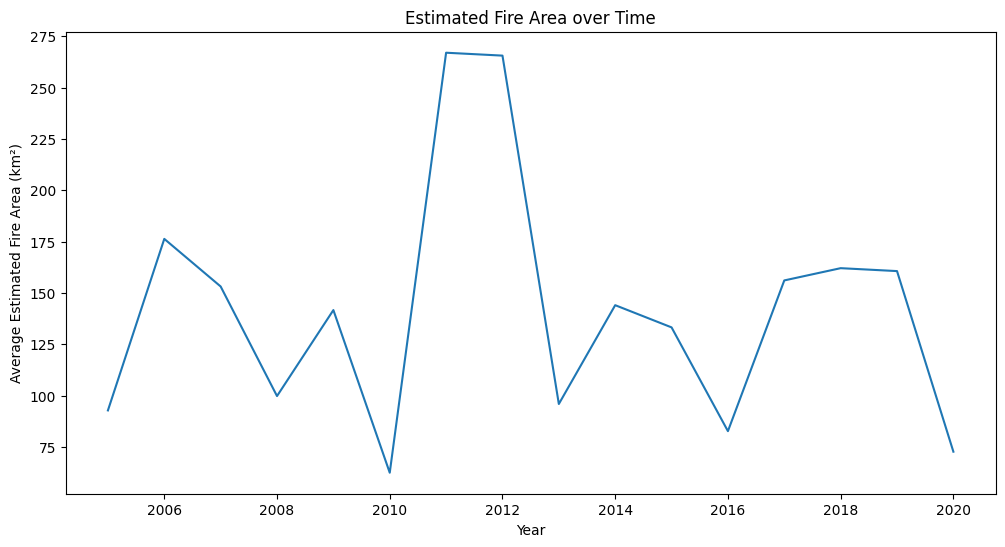

In [27]:
plt.figure(figsize=(12, 6))
df_new.plot(x=df_new.index, y=df_new.values)
plt.title('Estimated Fire Area over Time')
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.show()

In [29]:
df_new = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean()

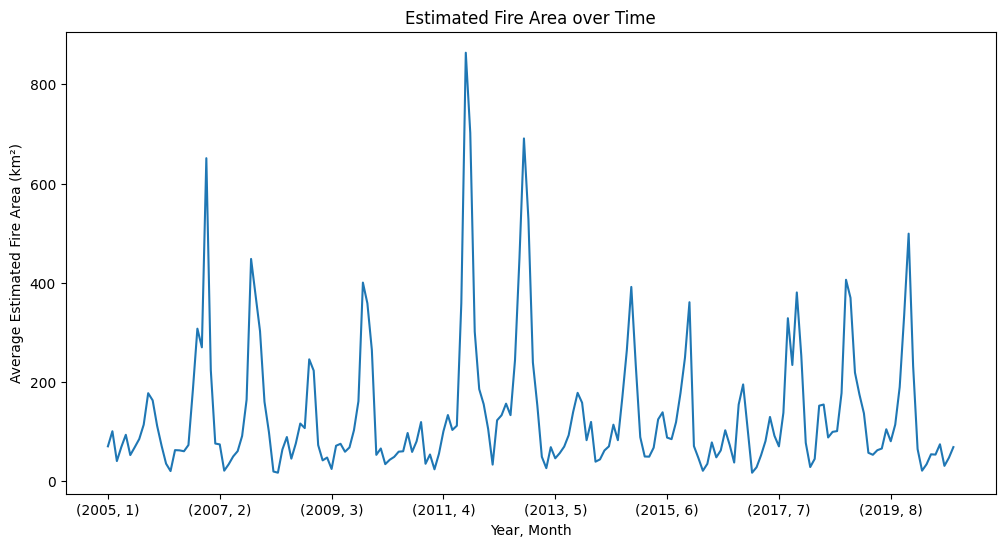

In [30]:
plt.figure(figsize=(12, 6))
df_new.plot(x=df_new.index, y=df_new.values)
plt.title('Estimated Fire Area over Time')
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.show()

In [31]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

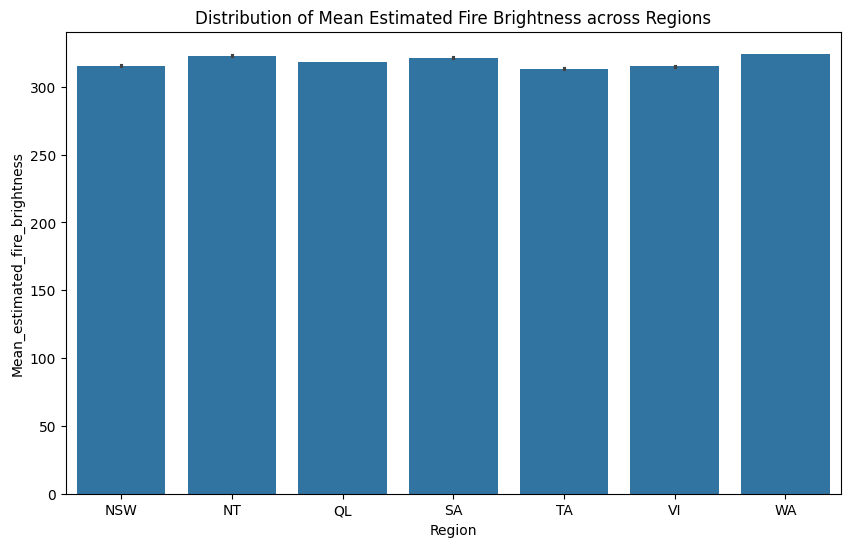

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean_estimated_fire_brightness')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

In [36]:
region_counts = df.groupby('Region')['Count'].sum()

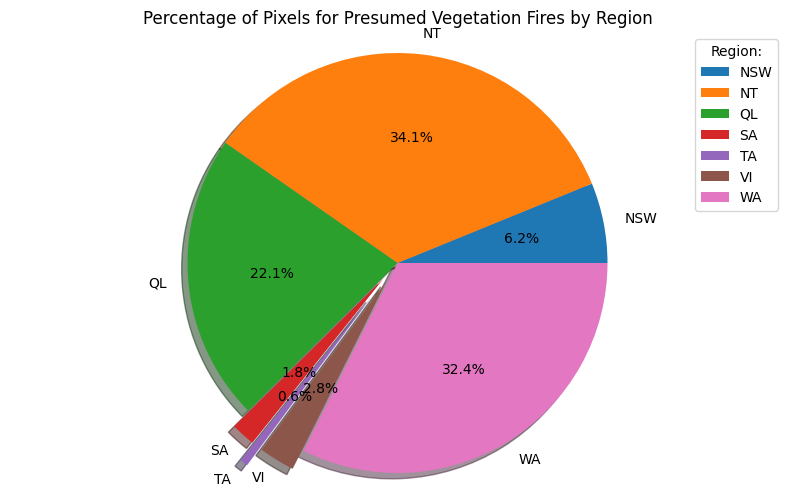

In [42]:
plt.figure(figsize=(10, 6))
myexplode = [0, 0, 0, 0.1, 0.2, 0.1, 0]
plt.pie(x=region_counts, labels=region_counts.index, explode=myexplode, shadow=True, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.legend(title='Region:')
plt.show()

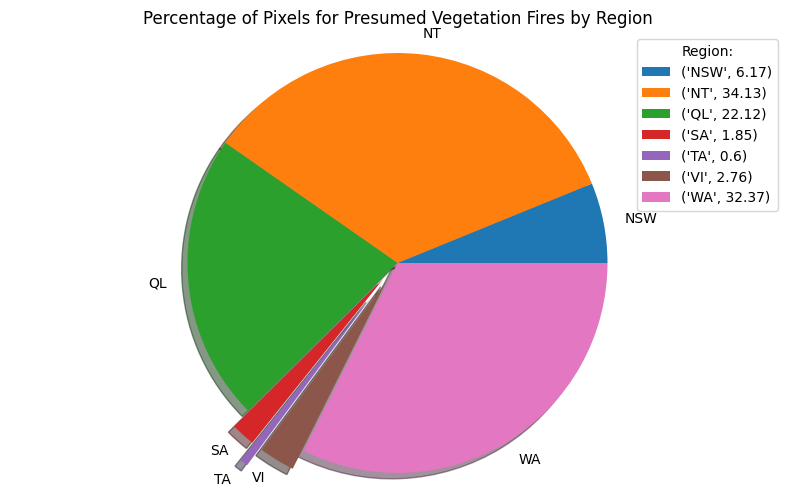

In [43]:
plt.figure(figsize=(10, 6))
myexplode = [0, 0, 0, 0.1, 0.2, 0.1, 0]
plt.pie(x=region_counts, labels=region_counts.index, explode=myexplode, shadow=True)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)], title='Region:')
plt.axis('equal')
plt.show()

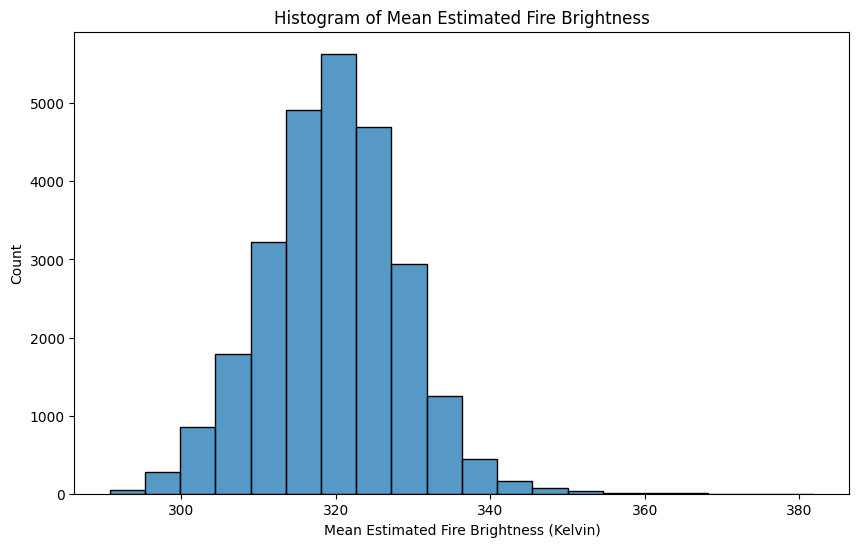

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Mean_estimated_fire_brightness', bins=20)
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.show()

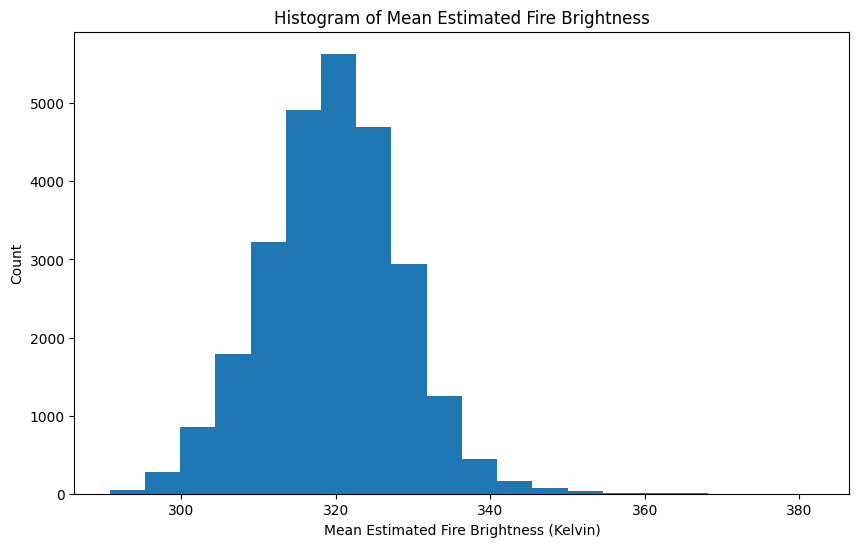

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20, )
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.show()

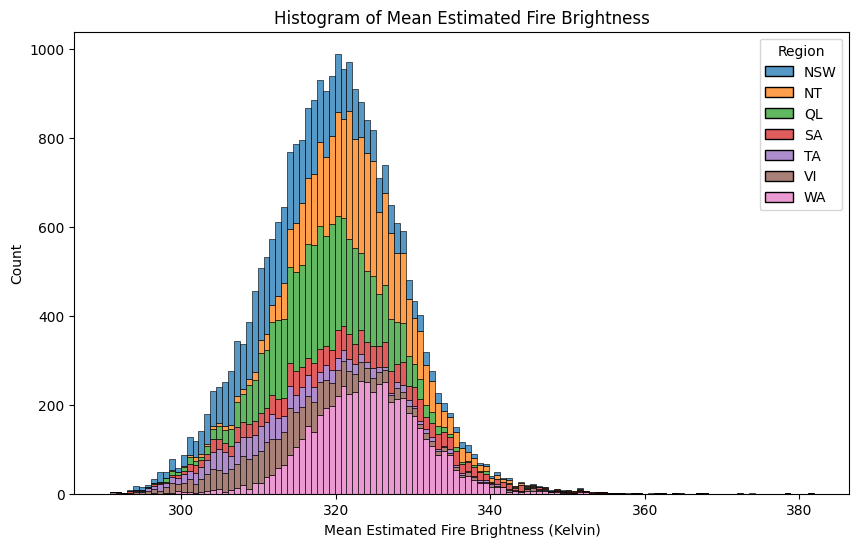

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.show()

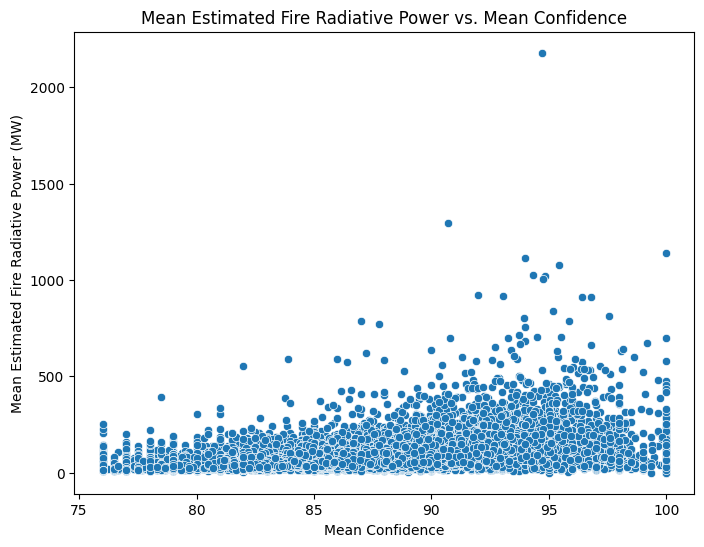

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.ylabel('Mean Estimated Fire Radiative Power (MW)')
plt.xlabel('Mean Confidence')
plt.show()

In [58]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411],
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [59]:
# instantiate a feature group
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)